In [1]:
import pandas as pd
import numpy as np
from sklearn import preprocessing
import matplotlib.pyplot as plt 
plt.rc("font", size=14)
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
import seaborn as sns
sns.set(style="white")
sns.set(style="whitegrid", color_codes=True)

## Data

The data is related with direct marketing campaigns (phone calls) of a Portuguese banking institution. The classification goal is to predict if the client will subscribe (1/0) a term deposit (variable y).

This dataset provides the customer information. It includes 41188 records and 21 fields.

In [2]:
### Q. Read the bank dataset 

# Loading the bank dataset.
Bank =  pd.read_csv('bank.csv', sep=';', engine='python')

In [3]:
Bank.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,30,blue-collar,married,basic.9y,no,yes,no,cellular,may,fri,...,2,999,0,nonexistent,-1.8,92.893,-46.2,1.313,5099.1,no
1,39,services,single,high.school,no,no,no,telephone,may,fri,...,4,999,0,nonexistent,1.1,93.994,-36.4,4.855,5191.0,no
2,25,services,married,high.school,no,yes,no,telephone,jun,wed,...,1,999,0,nonexistent,1.4,94.465,-41.8,4.962,5228.1,no
3,38,services,married,basic.9y,no,unknown,unknown,telephone,jun,fri,...,3,999,0,nonexistent,1.4,94.465,-41.8,4.959,5228.1,no
4,47,admin.,married,university.degree,no,yes,no,cellular,nov,mon,...,1,999,0,nonexistent,-0.1,93.200,-42.0,4.191,5195.8,no


#### Input variables

1 - age (numeric)

2 - job : type of job (categorical: 'admin.','blue-collar','entrepreneur','housemaid','management','retired','self-employed','services','student','technician','unemployed','unknown')

3 - marital : marital status (categorical: 'divorced','married','single','unknown'; note: 'divorced' means divorced or widowed)

4 - education (categorical: 'basic.4y','basic.6y','basic.9y','high.school','illiterate','professional.course','university.degree','unknown')

5 - default: has credit in default? (categorical: 'no','yes','unknown')

6 - housing: has housing loan? (categorical: 'no','yes','unknown')

7 - loan: has personal loan? (categorical: 'no','yes','unknown')

8 - contact: contact communication type (categorical: 'cellular','telephone')

9 - month: last contact month of year (categorical: 'jan', 'feb', 'mar', ..., 'nov', 'dec')

10 - day_of_week: last contact day of the week (categorical: 'mon','tue','wed','thu','fri')

11 - duration: last contact duration, in seconds (numeric). Important note: this attribute highly affects the output target (e.g., if duration=0 then y='no'). Yet, the duration is not known before a call is performed. Also, after the end of the call y is obviously known. Thus, this input should only be included for benchmark purposes and should be discarded if the intention is to have a realistic predictive model.

12 - campaign: number of contacts performed during this campaign and for this client (numeric, includes last contact)

13 - pdays: number of days that passed by after the client was last contacted from a previous campaign (numeric; 999 means client was not previously contacted)

14 - previous: number of contacts performed before this campaign and for this client (numeric)

15 - poutcome: outcome of the previous marketing campaign (categorical: 'failure','nonexistent','success')

16 - emp.var.rate: employment variation rate - (numeric)

17 - cons.price.idx: consumer price index - (numeric)

18 - cons.conf.idx: consumer confidence index - (numeric) 

19 - euribor3m: euribor 3 month rate - (numeric)

20 - nr.employed: number of employees - (numeric)

#### Predict variable (desired target):

y - has the client subscribed a term deposit? (binary: '1','0')

The education column of the dataset has many categories and we need to reduce the categories for a better modelling. The education column has the following categories:

In [4]:
### Data transformation
Bank['education'].unique()

array(['basic.9y', 'high.school', 'university.degree',
       'professional.course', 'basic.6y', 'basic.4y', 'unknown',
       'illiterate'], dtype=object)

Let us group "basic.4y", "basic.9y" and "basic.6y" together and call them "basic".

In [5]:
Bank['education']=np.where(Bank['education'] =='basic.9y', 'Basic', Bank['education'])
Bank['education']=np.where(Bank['education'] =='basic.6y', 'Basic', Bank['education'])
Bank['education']=np.where(Bank['education'] =='basic.4y', 'Basic', Bank['education'])

After grouping, this is the columns

In [6]:
Bank['education'].unique()

array(['Basic', 'high.school', 'university.degree', 'professional.course',
       'unknown', 'illiterate'], dtype=object)

### Data preparation

In [7]:
### Q. Find out in the target column what is the respective count of values
Bank['y'].value_counts()

no     3668
yes     451
Name: y, dtype: int64

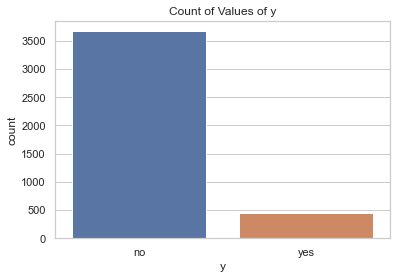

In [8]:
### Q. Also plot the values of y in form of a bar graph

sns.countplot(x ='y', data = Bank)
plt.title("Count of Values of y")
plt.show()

There are 36548 no's and 4640 yes's in the outcome variables.

Let's get a sense of the numbers across the two classes

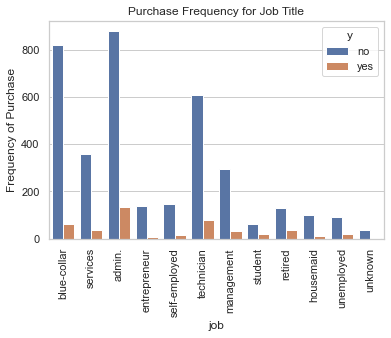

In [9]:
## Create a visualization as shown below for variable 'job' and frequency of purchase

chart = sns.countplot(x ='job', data = Bank, hue = "y")
plt.title("Purchase Frequency for Job Title")
plt.ylabel("Frequency of Purchase")
chart.set_xticklabels(chart.get_xticklabels(), rotation=90)
plt.show()

The frequency of purchase of the deposit depends a great deal on the job title. Thus, the job title can be a good predictor of the outcome variable.

In [10]:
### Create a stacked bar chart between variables 'Education','Purchase' and Proportion of Customers

In [11]:
# Creating a new dataframe based on the education and number of yes's and no's of the output variable
basic = Bank.loc[Bank.education == 'Basic', :]['y'].value_counts()
high_school = Bank.loc[Bank.education == 'high.school', :]['y'].value_counts()
illiterate = Bank.loc[Bank.education == 'illiterate', :]['y'].value_counts()
pro_course = Bank.loc[Bank.education == 'professional.course', :]['y'].value_counts()
uni_degree = Bank.loc[Bank.education == 'university.degree', :]['y'].value_counts()
unknown = Bank.loc[Bank.education == 'unknown', :]['y'].value_counts()

edu = pd.DataFrame([basic, high_school, illiterate, pro_course, uni_degree, unknown])
edu.index = ['Basic', 'high.school', 'illiterate', 'professional.course', 'university.degree', 'unknown']

edu

,no,yes
Basic,1133.0,98.0
high.school,824.0,97.0
illiterate,1.0,NaN
professional.course,470.0,65.0
university.degree,1099.0,165.0
unknown,141.0,26.0


In [12]:
# Filling the missing values with 0
edu.yes.fillna(0, inplace =True)
edu

,no,yes
Basic,1133.0,98.0
high.school,824.0,97.0
illiterate,1.0,0.0
professional.course,470.0,65.0
university.degree,1099.0,165.0
unknown,141.0,26.0


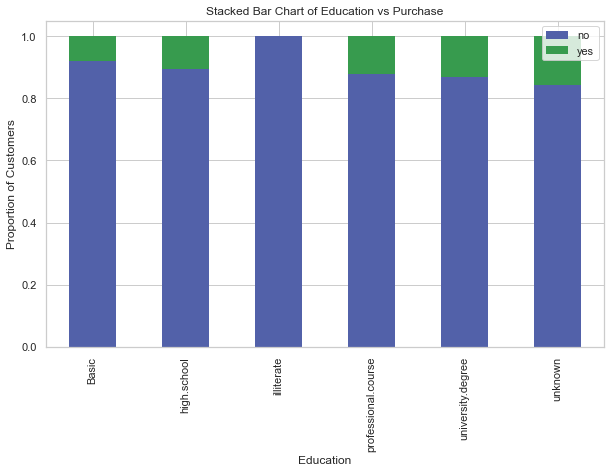

In [13]:
# Plotting the proportion of clients according to the education level
ax = edu.apply(lambda x:x/sum(x), axis = 1).plot(kind='bar', stacked = True, figsize = (10,6),
                                                color = {'no':'#5261A9', 'yes':'#379B4E'},
                                                xlabel = 'Education', ylabel = 'Proportion of Customers',
                                                fontsize = 11, linewidth = 0)
ax.set_title(label = 'Stacked Bar Chart of Education vs Purchase', fontsize = 12)

plt.show()

Education seems a good predictor of the outcome variable.

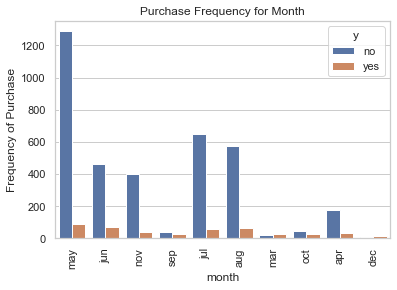

In [14]:
## Q. Write code for the visualization as shown below

chart = sns.countplot(x ='month', data = Bank, hue = "y")
plt.title("Purchase Frequency for Month")
plt.ylabel("Frequency of Purchase")
chart.set_xticklabels(chart.get_xticklabels(), rotation=90)
plt.show()

Month might be a good predictor of the outcome variable

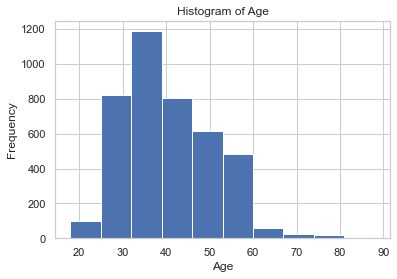

In [15]:
## Q. Write code for the visualization as shown below

plt.hist(Bank['age']) 
plt.xlabel("Age")
plt.ylabel("Frequency")
plt.title('Histogram of Age')
plt.show()

The most of the customers of the bank in this dataset are in the age range of 30-40.

In [16]:
## Write code to convert following columns to equivalent dummy variables

# Converting categorical columns to equivalent dummy variables
cat_vars = ['job','marital','education','default','housing','loan','contact','month','day_of_week','poutcome', 'y']
Bank = pd.get_dummies(Bank ,columns = cat_vars, drop_first = True)
Bank

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,...,month_nov,month_oct,month_sep,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed,poutcome_nonexistent,poutcome_success,y_yes
0,30,487,2,999,0,-1.8,92.893,-46.2,1.313,5099.1,...,0,0,0,0,0,0,0,1,0,0
1,39,346,4,999,0,1.1,93.994,-36.4,4.855,5191.0,...,0,0,0,0,0,0,0,1,0,0
2,25,227,1,999,0,1.4,94.465,-41.8,4.962,5228.1,...,0,0,0,0,0,0,1,1,0,0
3,38,17,3,999,0,1.4,94.465,-41.8,4.959,5228.1,...,0,0,0,0,0,0,0,1,0,0
4,47,58,1,999,0,-0.1,93.200,-42.0,4.191,5195.8,...,1,0,0,1,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4114,30,53,1,999,0,1.4,93.918,-42.7,4.958,5228.1,...,0,0,0,0,1,0,0,1,0,0
4115,39,219,1,999,0,1.4,93.918,-42.7,4.959,5228.1,...,0,0,0,0,0,0,0,1,0,0
4116,27,64,2,999,1,-1.8,92.893,-46.2,1.354,5099.1,...,0,0,0,1,0,0,0,0,0,0
4117,58,528,1,999,0,1.4,93.444,-36.1,4.966,5228.1,...,0,0,0,0,0,0,0,1,0,0


### Feature Selection

In [17]:
## Find the best posible features using feature engineering techniques. 

For example --

The Recursive Feature Elimination (RFE) has helped us select the following features: "previous", "euribor3m", "job_blue-collar", "job_retired", "job_services", "job_student", "default_no", "month_aug", "month_dec", "month_jul", "month_nov", "month_oct", "month_sep", "day_of_week_fri", "day_of_week_wed", "poutcome_failure", "poutcome_nonexistent", "poutcome_success".

In [18]:
y = Bank.iloc[:,-1].values
y

array([0, 0, 0, ..., 0, 0, 0], dtype=uint8)

In [19]:
X = Bank.iloc[:,0:51].values
X

array([[ 30., 487.,   2., ...,   0.,   1.,   0.],
       [ 39., 346.,   4., ...,   0.,   1.,   0.],
       [ 25., 227.,   1., ...,   1.,   1.,   0.],
       ...,
       [ 27.,  64.,   2., ...,   0.,   0.,   0.],
       [ 58., 528.,   1., ...,   0.,   1.,   0.],
       [ 34., 175.,   1., ...,   1.,   1.,   0.]])

In [20]:
from sklearn.ensemble import ExtraTreesClassifier
tree_clf = ExtraTreesClassifier()
tree_clf.fit(X, y)

tree_clf.feature_importances_

array([6.19355665e-02, 1.94564500e-01, 4.55691746e-02, 4.17694684e-02,
       1.52497437e-02, 2.37334431e-02, 1.81819196e-02, 2.09379631e-02,
       8.16739286e-02, 4.97870328e-02, 1.43886463e-02, 4.98329128e-03,
       4.73586826e-03, 1.16342197e-02, 1.13633005e-02, 5.19078865e-03,
       1.01870515e-02, 5.95712913e-03, 1.71876787e-02, 6.42037226e-03,
       3.17269130e-03, 1.94884990e-02, 1.67214834e-02, 1.03764314e-03,
       1.83894386e-02, 1.29839595e-04, 1.48685195e-02, 1.84083378e-02,
       7.44806859e-03, 1.31286082e-02, 2.48992304e-05, 2.39921370e-03,
       2.76319694e-02, 2.61430950e-03, 1.69512988e-02, 1.40529098e-02,
       5.54998210e-03, 3.98337257e-03, 6.43510289e-03, 8.79390686e-03,
       1.02352836e-02, 1.04863582e-02, 5.07166386e-03, 6.77082476e-03,
       4.30007239e-03, 1.83968286e-02, 1.84400395e-02, 1.79225731e-02,
       1.65044771e-02, 1.36033649e-02, 3.15873336e-02])

In [21]:
importances = tree_clf.feature_importances_
feature_names = Bank.iloc[:, 0:51].columns.tolist()
feature_names
feature_imp_dir = dict(zip(feature_names, importances))
features = sorted(feature_imp_dir.items(), key = lambda x: x[1], reverse = True)
feature_imp_dir

{'age': 0.061935566489560036,
 'duration': 0.1945644997816388,
 'campaign': 0.045569174648394335,
 'pdays': 0.04176946837994634,
 'previous': 0.015249743749478382,
 'emp.var.rate': 0.023733443052259568,
 'cons.price.idx': 0.018181919627658295,
 'cons.conf.idx': 0.020937963077436946,
 'euribor3m': 0.08167392863391677,
 'nr.employed': 0.04978703281071881,
 'job_blue-collar': 0.014388646254208807,
 'job_entrepreneur': 0.004983291278993393,
 'job_housemaid': 0.0047358682551395465,
 'job_management': 0.0116342196559239,
 'job_retired': 0.011363300491059788,
 'job_self-employed': 0.005190788649931222,
 'job_services': 0.010187051469285155,
 'job_student': 0.005957129127603241,
 'job_technician': 0.01718767869562796,
 'job_unemployed': 0.00642037225608296,
 'job_unknown': 0.0031726913025898955,
 'marital_married': 0.019488498970778787,
 'marital_single': 0.0167214834124988,
 'marital_unknown': 0.0010376431428317922,
 'education_high.school': 0.01838943863910551,
 'education_illiterate': 0.000

Text(0.5, 1.0, 'Important Features in Bank Data')

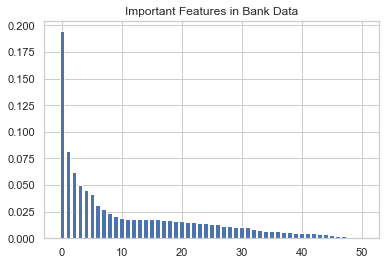

In [22]:
plt.bar(range(len(features)), [imp[1] for imp in features], align = 'center')
plt.title('Important Features in Bank Data')

In [23]:
from sklearn.feature_selection import SelectFromModel
abc = SelectFromModel(tree_clf, prefit = True)
x_updated = abc.transform(X)
print('Total Features Count:', np.array(X).shape[1])
print('Selected Features:', np.array(x_updated).shape[1])      

Total Features Count: 51
Selected Features: 10


### Implementing the model

### Logistic Regression Model Fitting

In [24]:
## Write code to implement Logistic Regression module by training the X,Y variables and perform prediction on the Test dataset.

y = Bank.iloc[:,-1].values
y

array([0, 0, 0, ..., 0, 0, 0], dtype=uint8)

In [25]:
# Spliting the data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x_updated, y, test_size = 0.2, random_state = 0)

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler().fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [26]:
# Fitting Logistic Regression to training set
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression(random_state = 0)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

### Confusion Matrix

In [27]:
## Create and Analyze the confusion matrix

In [28]:
# Confusion matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print('confusion matrix:\n',cm)

confusion matrix:
 [[719  29]
 [ 44  32]]


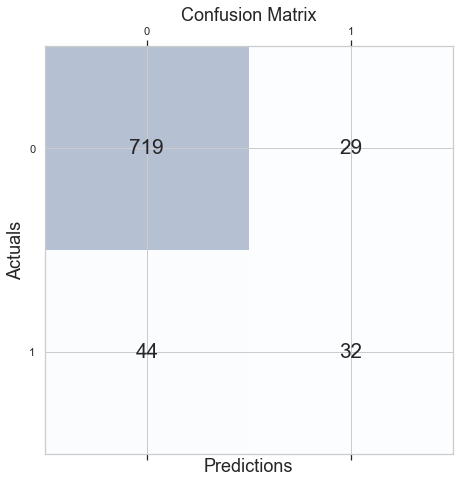

In [29]:
# Plotting the Confusion Matrix

fig, ax = plt.subplots(figsize=(7.5, 7.5))
ax.matshow(cm, cmap=plt.cm.Blues, alpha=0.3)
for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
        ax.text(x=j, y=i,s=cm[i, j], va='center', ha='center', size='xx-large')
 
plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actuals', fontsize=18)
plt.title('Confusion Matrix', fontsize=18)
plt.show()

### ROC/AUC

In [30]:
## Check for ROC and Area under the curve.

In [31]:
from sklearn import metrics

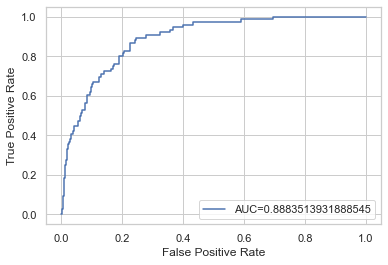

In [32]:
# Defining Metrics
y_pred_proba = clf.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)

# Creating ROC curve
plt.plot(fpr,tpr,label="AUC="+str(auc))
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend(loc=4)
plt.show()

In [33]:
## Calculate and analyze the Recall and precision

In [34]:
from sklearn.metrics import classification_report
class_rep = classification_report(y_test,y_pred)
print('Classification Report:\n',class_rep)

Classification Report:
               precision    recall  f1-score   support

           0       0.94      0.96      0.95       748
           1       0.52      0.42      0.47        76

    accuracy                           0.91       824
   macro avg       0.73      0.69      0.71       824
weighted avg       0.90      0.91      0.91       824



### Accuracy

In [35]:
## Find the accuracy of your model

In [36]:
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test, y_pred)
print('accuracy score = ',accuracy)

accuracy score =  0.9114077669902912


### Cross-validation

In [37]:
## Allow 10-fold cross validation to run on all cores.

In [38]:
# Evaluating a logistic regression model using k-fold cross-validation

from numpy import mean
from numpy import std
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

cv = KFold(n_splits=10, random_state=1, shuffle=True)

scores = cross_val_score(clf, x_updated, y, scoring='accuracy', cv=cv, n_jobs=-1)

print('Accuracy: %.3f (%.3f)' % (mean(scores), std(scores)))

Accuracy: 0.912 (0.010)


### Model Tuning

In [39]:
## Tune in different attributes of the model and get better accuracy

In [40]:
from sklearn.model_selection import GridSearchCV

In [41]:
#Logistic Regression
parameters = [{'penalty': ['l1', 'l2'], 'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000],
 'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga']}]
grid_search = GridSearchCV(estimator = clf,
 param_grid = parameters,
 scoring = 'accuracy',
 cv = 10,
 n_jobs = -1)
grid_search.fit(X_train, y_train)
best_accuracy_log = grid_search.best_score_
best_parameters = grid_search.best_params_
print(best_accuracy_log)
print(best_parameters)

0.9141291332780697
{'C': 0.1, 'penalty': 'l2', 'solver': 'newton-cg'}


C:\Users\sangita\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:922: UserWarning: One or more of the test scores are non-finite: [       nan        nan 0.88619324        nan 0.88619324 0.89105001
 0.89105001 0.90623653 0.89105001 0.89105001        nan        nan
 0.90623561        nan 0.90502072 0.91078475 0.91078475 0.91018145
 0.91078475 0.91078475        nan        nan 0.91382702        nan
 0.91382702 0.91412913 0.91412913 0.91291333 0.91412913 0.91412913
        nan        nan 0.91291701        nan 0.91291701 0.91291701
 0.91291701 0.91322004 0.91291701 0.91291701        nan        nan
 0.91291701        nan 0.91291701 0.91291701 0.91291701 0.91291701
 0.91291701 0.91291701        nan        nan 0.91291701        nan
 0.91291701 0.91291701 0.91291701 0.91291701 0.91291701 0.91291701
        nan        nan 0.91291701        nan 0.91291701 0.91291701
 0.91291701 0.91291701 0.91291701 0.91291701]
  warnings.warn(
